[View in Colaboratory](https://colab.research.google.com/github/wowufoundme/colab_files/blob/master/KMeans_BreastCancerData.ipynb)

In [0]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Creating file buffers and lists
df = pd.read_csv('https://raw.githubusercontent.com/wowufoundme/data_sets_practice/master/temp.csv')
X = df.astype(float).values.tolist()

In [3]:
# Checking if import successful
df.head()

,5,1,1.1,1.2,2,1.3,3,1.4,1.5,0
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1


In [0]:
# Defining variables and creating Test Data
colors = 10 * ["g", "r", "c", "b", "k"]
test_size = 0.2
var = int((1 - test_size) * len(X))
train_data = X[:var]
test_data = X[var:]
for i in range(len(train_data)):
	train_data[i] = train_data[i][:-1]
train_data = np.array(train_data)

In [0]:
# Class K_Means creates the means of the centroids in the function 'fit'
class K_Means:
	def __init__(self, k=2, tol=0.001, max_iter=300):
		self.k = k
		self.tol = tol
		self.max_iter = max_iter

	def fit(self, data):
		self.centroids = {}
		for i in range(self.k):
			self.centroids[i] = data[i]

		for i in range(self.max_iter):
			self.classifications = {}

			for i in range(self.k):
				self.classifications[i] = []

			for featureset in data:
				distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in
				             self.centroids]
				classification = distances.index(min(distances))

				self.classifications[classification].append(featureset)

			prev_centroids = dict(self.centroids)

			for classification in self.classifications:
				self.centroids[classification] = np.average(self.classifications[classification], axis=0)

			optimized = True

			for c in self.centroids:
				original_centroid = prev_centroids[c]
				current_centroid = self.centroids[c]
				if np.sum((current_centroid - original_centroid) / original_centroid * 100.0) > self.tol:
					optimized = False
			if optimized:
				break

	def predict(self, data):
		distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
		classification = distances.index(min(distances))
		return classification

In [6]:
# karr stores the values of k and acc stores the accuracy of the data
karr = []
acc = []
for k in range(1,4):
	clf = K_Means(k)
	clf.fit(train_data)
	correct = 0
	total = 0
	for row in test_data:
		vote  = clf.predict(np.array(row[:-1]))
		if vote == row[-1]:
			correct += 1
		total += 1
	karr.append(k)
	acc.append(correct/total*100)
print(karr)
print(acc)

[1, 2, 3]
[75.0, 74.28571428571429, 74.28571428571429]


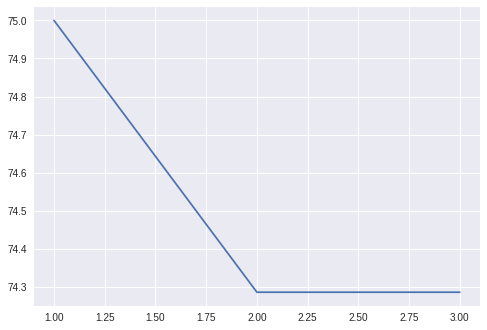

In [7]:
# Plotting k vs Accuracy on the graph
plt.plot(karr, acc)
plt.show()